<a href="https://colab.research.google.com/github/shahad-jeza/kaust_training/blob/main/Neural_networks_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks 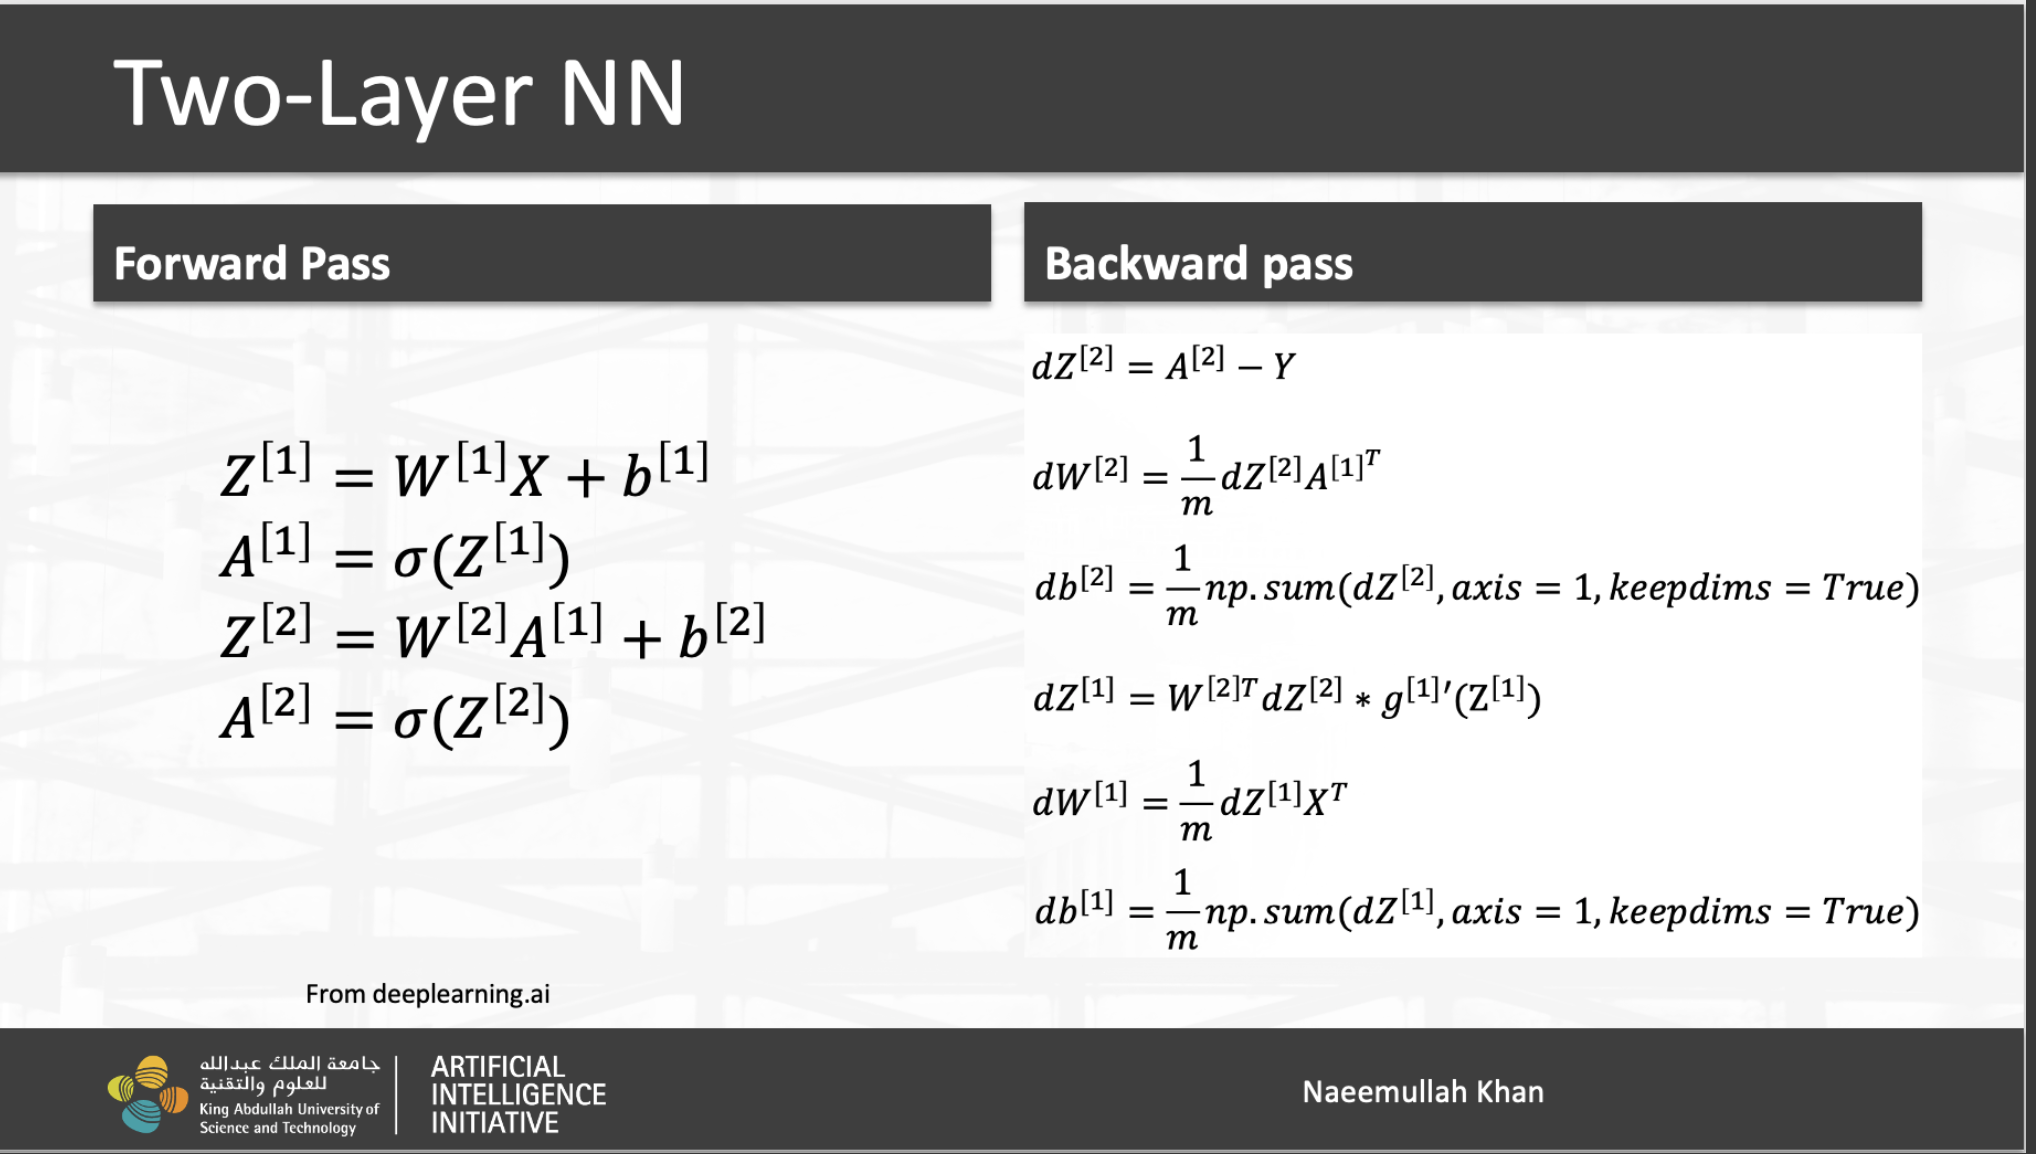



In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)

    plt.show()

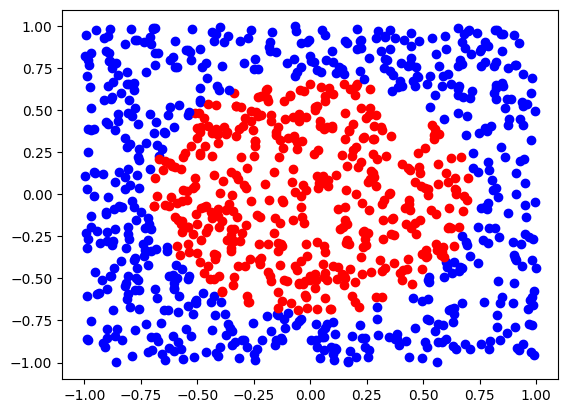

(2, 1000)
(1, 1000)


In [3]:
#Q1
num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
y=X[0,:]**2+X[1,:]**2-0.5>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [4]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def get_loss(yhat ,y):
  return np.mean(-y * np.log(yhat) - (1-y)*np.log(1-yhat) , axis = 1) # if data in rows it will be 0 and flip the mul

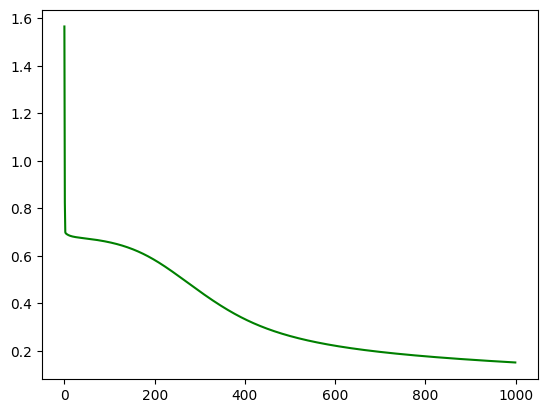

In [5]:
num_iter = 1000
lr = 0.001

ni = X.shape[0] # num of input features
nh = 10 # hidden
no = 1 # output feature

# shapes are defined by W1@X+b >>> W1 col = rows of X
W1 = np.random.randn(nh , ni)
b1 = np.zeros((nh,1)) # why zeros? intilze them then learn them

W2 = np.random.randn(no , nh)
b2 = np.zeros((no , 1))

loss = []
# data is in coulmns
for i in range (num_iter):
  ##### forward pass #####
  # first layer
  Z1 = W1 @ X + b1
  A1 = sigmoid(Z1)

  # second layer
  Z2 = W2 @ A1 + b2
  A2 = sigmoid(Z2) # A2 is yhat
  #########################

  # calucalte loss
  loss.append(get_loss(A2,y))

  ####### backward pass ##########
  dZ2 = A2 - y
  dW2 = dZ2 @ A1.T
  db2 = np.sum(dZ2 , axis=1 , keepdims=True) # keep the diemnsion >> good for brodcasting

  dZ1 = W2.T @ dZ2 * A1*(1-A1)
  dW1 = dZ1 @ X.T
  db1 = np.sum(dZ1 , axis =1 , keepdims = True)
  #########################

  # optmization
  W1 -= lr* dW1
  b1 -= lr* db1
  W2 -= lr * dW2
  b2 -= lr* db2

plt.plot(loss , 'g')



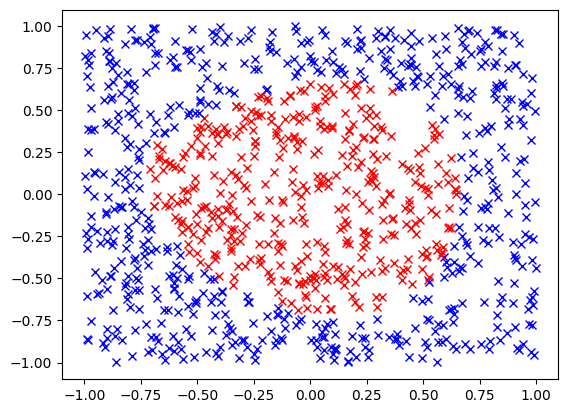

In [6]:
plotClass(X, A2>0.5 , 'x')

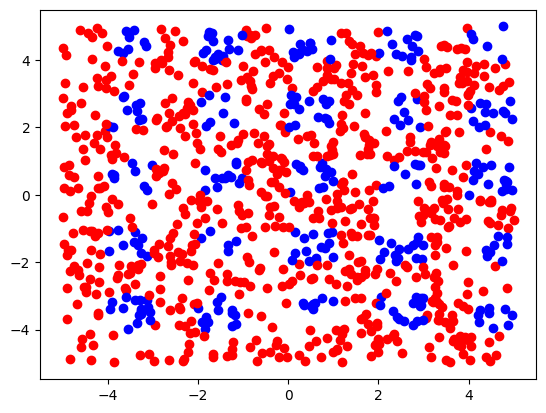

(2, 1000)
(1, 1000)


In [8]:
#Q7
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=(np.floor(X[0,:]%2)==0)& (np.floor(X[1,:]%2)==0)>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

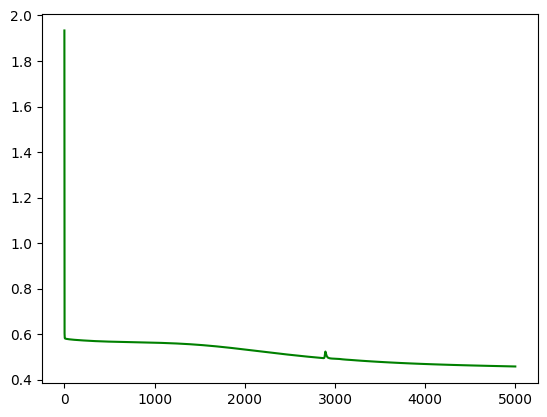

In [28]:
num_iter = 5000
lr = 0.001

ni = X.shape[0] # num of input features
nh = 20 # hidden
no = 1 # output feature

# shapes are defined by W1@X+b >>> W1 col = rows of X
W1 = np.random.randn(nh , ni)
b1 = np.zeros((nh,1)) # why zeros? intilze them then learn them

W2 = np.random.randn(no , nh)
b2 = np.zeros((no , 1))

loss = []
# data is in coulmns
for i in range (num_iter):
  ##### forward pass #####
  # first layer
  Z1 = W1 @ X + b1
  A1 = sigmoid(Z1)

  # second layer
  Z2 = W2 @ A1 + b2
  A2 = sigmoid(Z2) # A2 is yhat
  #########################

  # calucalte loss
  loss.append(get_loss(A2,y))

  ####### backward pass ##########
  dZ2 = A2 - y
  dW2 = dZ2 @ A1.T
  db2 = np.sum(dZ2 , axis=1 , keepdims=True) # keep the diemnsion >> good for brodcasting

  dZ1 = W2.T @ dZ2 * A1*(1-A1)
  dW1 = dZ1 @ X.T
  db1 = np.sum(dZ1 , axis =1 , keepdims = True)
  #########################

  # optmization
  W1 -= lr* dW1
  b1 -= lr* db1
  W2 -= lr * dW2
  b2 -= lr* db2

plt.plot(loss , 'g')



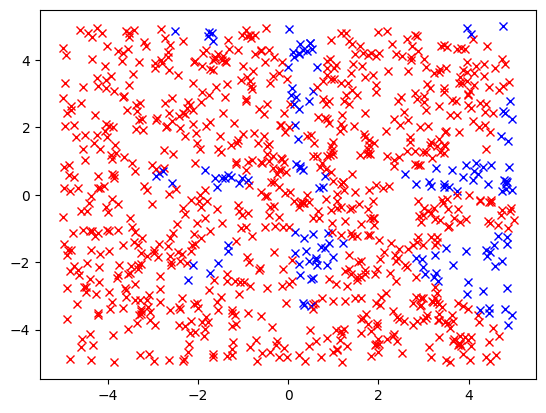

In [29]:
plotClass(X, A2>0.5 , 'x')